<a href="https://colab.research.google.com/github/prajaktasshinde/DS-ML/blob/main/Servo_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title Of The Project**

**Servo Prediction Using Linear Regression**

**Objective**

The objective of using linear regression for servo prediction is to create a mathematical model that can accurately predict the behavior or performance of a servo motor based on certain input features.

Import Library

In [1]:
import pandas as pd
import numpy as np

Import Data

In [2]:
data=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

Display The First Five Rows

In [3]:
data.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Display Info of DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Display Summary Statistics

In [6]:
data.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Display Column Names

In [7]:
data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

Display Shape Of DataFrame

In [8]:
data.shape

(167, 5)

Display Categories And Categorical Variables

In [9]:
data[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [10]:
data[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

Encoding of Categorical Features

In [11]:
data.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [12]:
data.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


Define y(dependent variable) & X(independent variable)

In [15]:
y=data['Class']
X=data[['Motor','Screw','Pgain','Vgain']]

In [16]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [17]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)


In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

Select Model

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

Model Prediction

In [22]:
y_pred=model.predict(X_test)

In [23]:
y_pred.shape

(51,)

In [24]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [27]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [28]:
r2_score(y_test,y_pred)

0.6807245170563927

Visualization of Actual VS Predicted Results

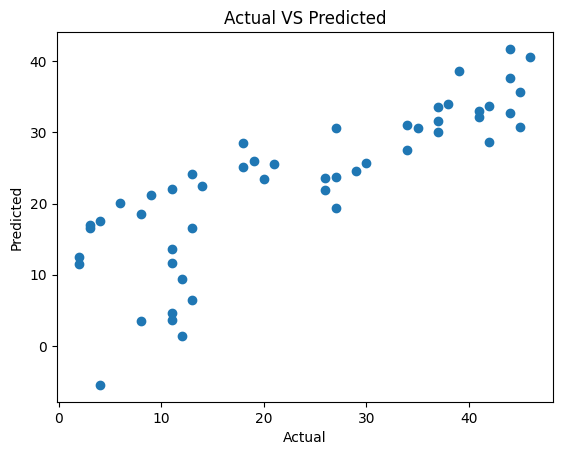

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()

Future Prediction

In [32]:
X_new=data.sample(1)

In [33]:
X_new

,Motor,Screw,Pgain,Vgain,Class
110,0,3,5,4,11


In [34]:
X_new.shape

(1, 5)

In [35]:
X_new=X_new.drop('Class',axis=1)

In [36]:
X_new

,Motor,Screw,Pgain,Vgain
110,0,3,5,4


In [37]:
X_new.shape

(1, 4)

In [38]:
y_pred_new=model.predict(X_new)

In [39]:
y_pred_new

array([15.70591821])

**Explaination**

Servo prediction using linear regression involves predicting the performance or behavior of a servo motor (such as its speed, position) based on certain input features (such as voltage, current) using a linear regression model. Linear regression is a statistical method used to model the relationship between a dependent variable (the target we want to predict) and one or more independent variables (the features).